In [1]:
import numpy as np
import pandas as pd
import os
import zipfile
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
import random
from PIL import Image
import plotly.graph_objects as go


In [2]:
#with zipfile.ZipFile('dogs-vs-cats/train.zip', 'r') as zip_ref:
 #   zip_ref.extractall('dogs-vs-cats/train')
#with zipfile.ZipFile('dogs-vs-cats/test1.zip', 'r') as zip_ref:
    #zip_ref.extractall('dogs-vs-cats/test')

In [3]:
train_dir = 'dogs-vs-cats/train/train'
test_dir = 'dogs-vs-cats/test/test1'

In [4]:
def load_images(folder, img_size=(64, 64), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)
    
    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]
    
    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")
    
    return np.array(images), np.array(labels)

In [5]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()
    
    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

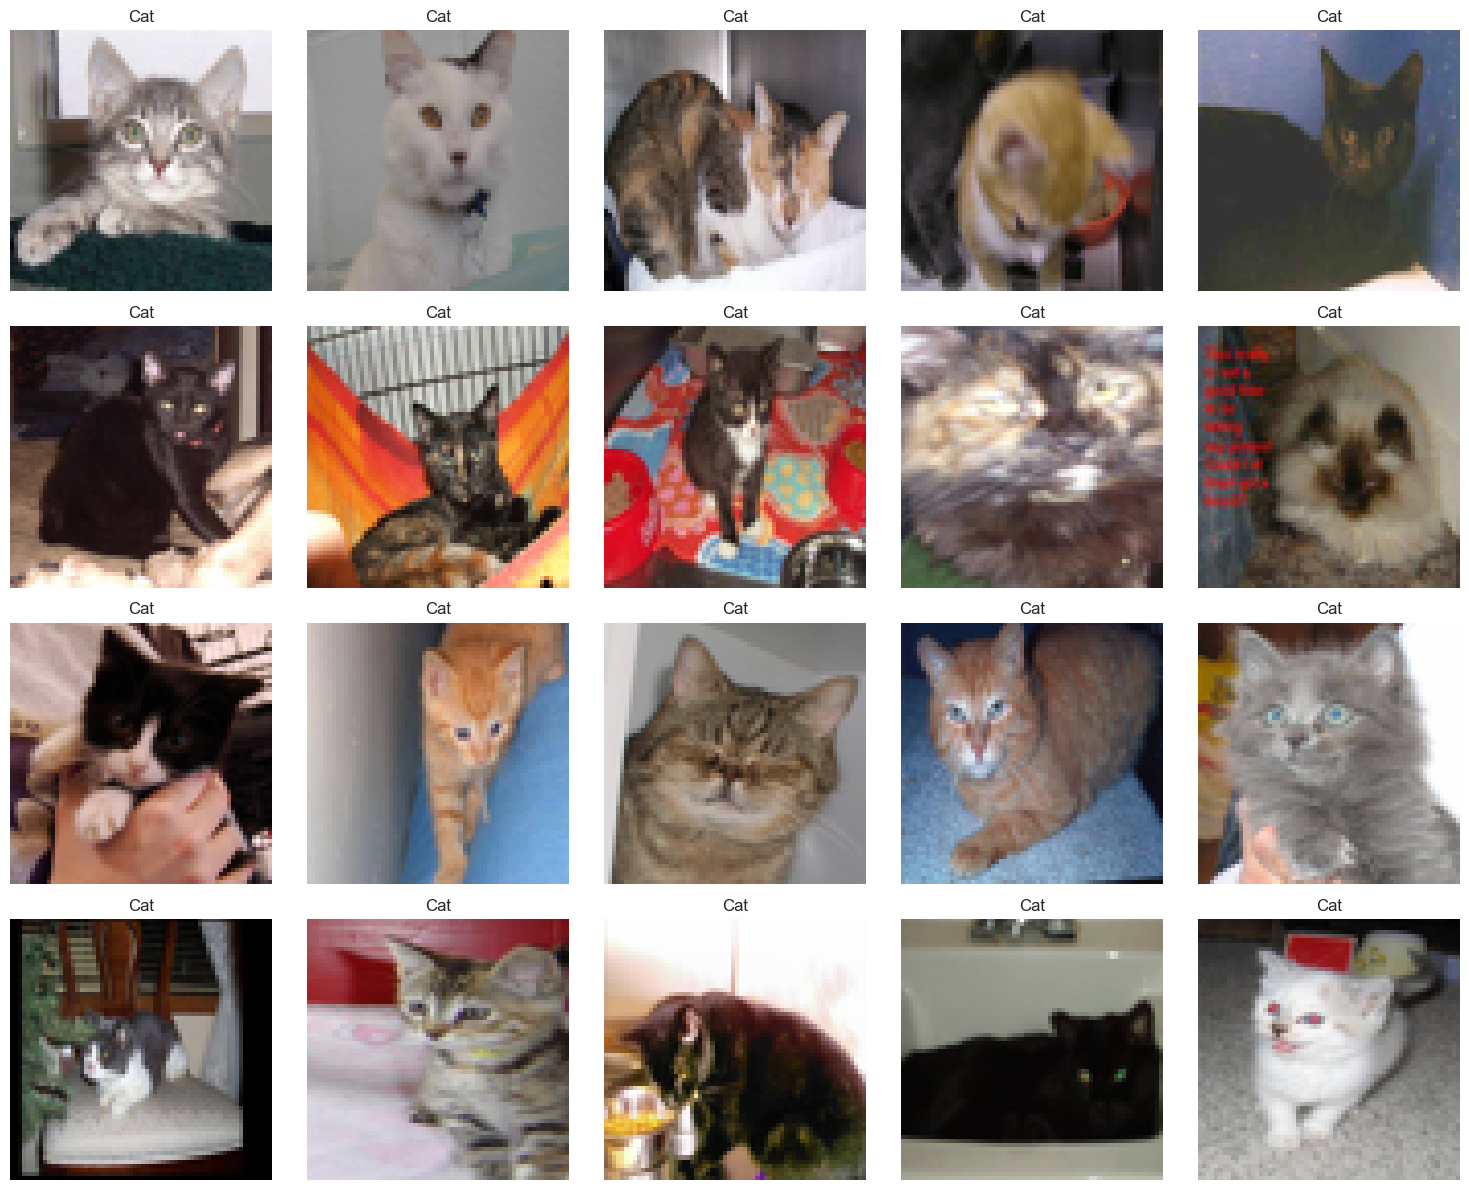

In [6]:
cat_images, cat_labels = load_images(train_dir, sample_count=20, label_filter='cat')
visualize_images(cat_images, cat_labels, sample_count=20)

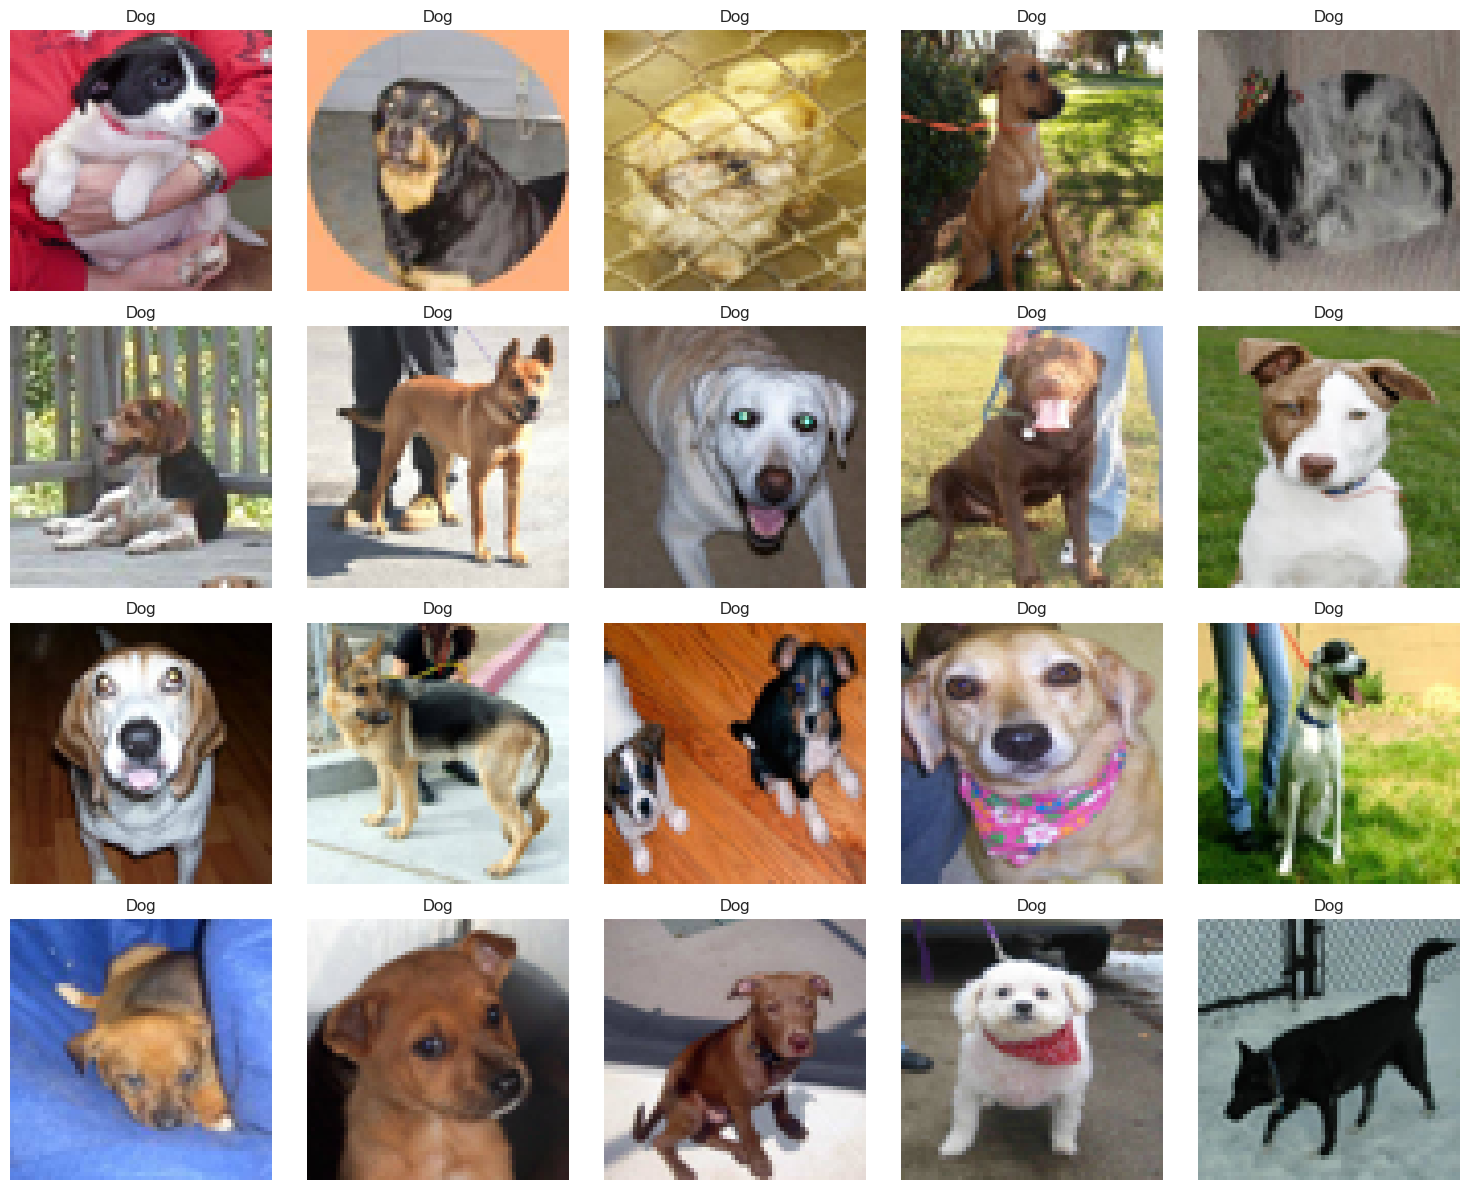

In [7]:
dog_images, dog_labels = load_images(train_dir, sample_count=20, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=20)

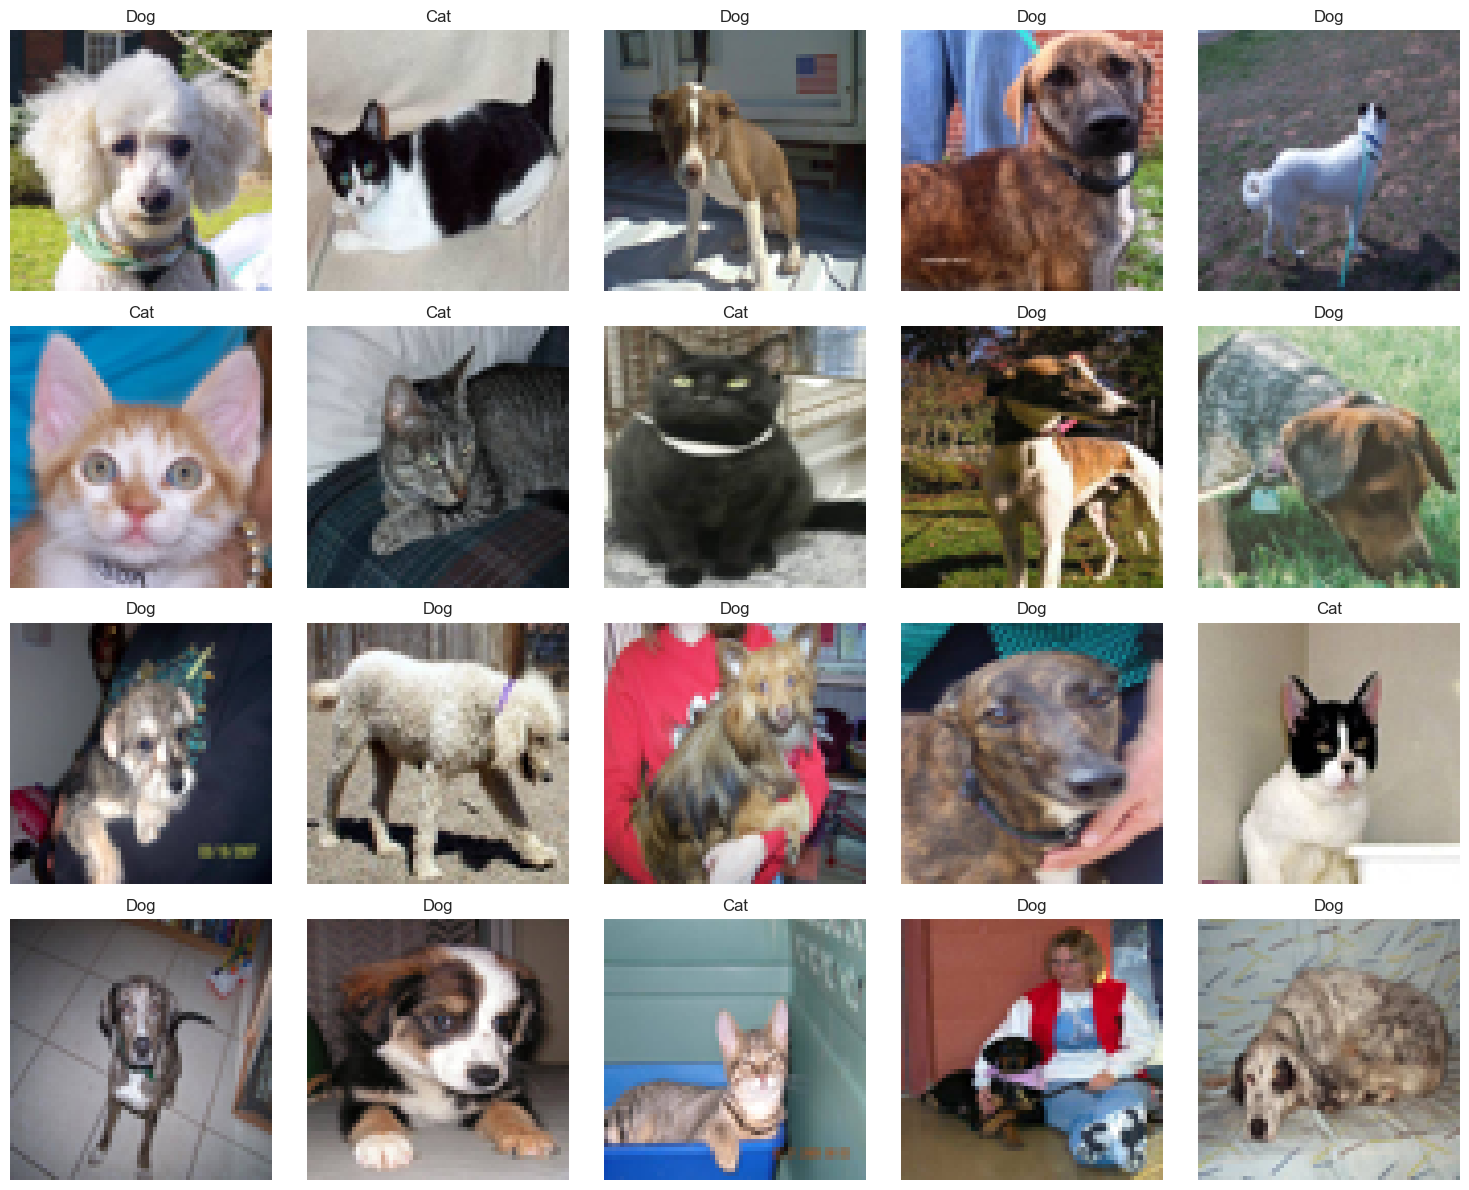

In [8]:
all_images, all_labels = load_images(train_dir, sample_count=20)
visualize_images(all_images, all_labels, sample_count=20)

In [9]:
images, labels = load_images(train_dir, sample_count=10000) 
images = images / 255.0

In [10]:
print("Shape of images array:", images.shape)

Shape of images array: (10000, 64, 64, 3)


In [11]:
print("Shape of the first image:", images[0].shape)

Shape of the first image: (64, 64, 3)


In [12]:
print(images[:2]) 
print(labels[:2])

[[[[1.50711265e-03 1.04575163e-03 8.76585928e-04]
   [1.32256824e-03 9.38100730e-04 7.53556324e-04]
   [1.98385236e-03 1.76855056e-03 1.43021915e-03]
   ...
   [3.82929642e-03 3.82929642e-03 3.81391772e-03]
   [3.81391772e-03 3.81391772e-03 3.78316032e-03]
   [3.81391772e-03 3.82929642e-03 3.78316032e-03]]

  [[1.64552095e-03 1.12264514e-03 8.76585928e-04]
   [1.55324875e-03 1.10726644e-03 9.07343329e-04]
   [1.93771626e-03 1.63014225e-03 1.35332564e-03]
   ...
   [3.82929642e-03 3.82929642e-03 3.87543253e-03]
   [3.82929642e-03 3.82929642e-03 3.89081123e-03]
   [3.81391772e-03 3.81391772e-03 3.87543253e-03]]

  [[1.44559785e-03 9.38100730e-04 5.22875817e-04]
   [1.66089965e-03 1.32256824e-03 8.45828527e-04]
   [1.96847366e-03 1.76855056e-03 1.33794694e-03]
   ...
   [3.75240292e-03 3.75240292e-03 3.41407151e-03]
   [3.67550942e-03 3.70626682e-03 3.15263360e-03]
   [3.62937332e-03 3.66013072e-03 2.93733180e-03]]

  ...

  [[1.50711265e-03 1.90695886e-03 1.18415994e-03]
   [1.64552095e-

In [13]:
n_samples, img_height, img_width, img_channels = images.shape
images_flat = images.reshape(n_samples, -1)

In [14]:
scaler = StandardScaler()
images_flat_scaled = scaler.fit_transform(images_flat)

In [15]:
perplexity = min(30, n_samples - 1)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
images_tsne = tsne.fit_transform(images_flat_scaled)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(images_flat_scaled, labels, test_size=0.2, random_state=42)

In [17]:
X_train

array([[ 0.52466866,  0.90700704,  1.16090425, ..., -0.14567273,
        -0.06775623, -0.25329302],
       [ 1.04004903,  0.53157169,  0.5809776 , ...,  1.21453866,
         0.98763672,  0.80211288],
       [-1.42232382, -1.38892451, -1.17294693, ..., -1.71287281,
        -1.46992115, -1.08882269],
       ...,
       [ 0.0092883 ,  0.41605312, -0.35256287, ...,  0.6083575 ,
         0.95748264,  0.03987529],
       [ 1.05436515,  1.16692382,  1.33063888, ...,  1.89464436,
         2.02795263,  2.03341977],
       [ 0.9541523 ,  0.53157169,  0.25565289, ..., -1.06233692,
        -0.83668538, -0.76633755]])

In [18]:
X_val

array([[ 1.75585509,  1.83115559,  1.96714375, ...,  0.1352405 ,
         0.38455504,  0.90472179],
       [ 1.01141678,  0.4016133 ,  0.02934005, ...,  1.21453866,
         1.31933165,  1.24186534],
       [-1.35074322, -1.28784577, -1.21538058, ..., -0.72228408,
        -0.5954527 , -0.60509499],
       ...,
       [ 1.95628078,  2.03331308,  2.10858928, ..., -1.10669164,
        -1.04776397, -0.8103128 ],
       [ 0.06655278,  0.05505759,  0.17078557, ...,  0.65271222,
         0.79163518,  0.86074654],
       [ 0.61056539,  0.73372918,  0.48196573, ..., -0.14567273,
        -0.08283327, -0.2386346 ]])

In [19]:
y_val

array([1, 1, 0, ..., 1, 1, 0])

In [20]:
unique, counts = np.unique(labels, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")

Class distribution: {0: 4944, 1: 5056}


In [21]:
def plot_tsne_data(tsne_data, labels, title):
    df_tsne = pd.DataFrame()
    df_tsne['X'] = tsne_data[:, 0]
    df_tsne['Y'] = tsne_data[:, 1]
    df_tsne['Label'] = labels
    df_tsne['Label'] = df_tsne['Label'].map({0: 'Cat', 1: 'Dog'})
    
    fig = px.scatter(df_tsne, x='X', y='Y', color='Label', title=title)
    fig.show()

plot_tsne_data(images_tsne, labels, 't-SNE visualization of Cats vs Dogs')

In [22]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
y_val_pred = svm.predict(X_val)

In [24]:
y_val_pred

array([1, 1, 1, ..., 0, 0, 1])

In [25]:
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred, target_names=['Cat', 'Dog'])
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [26]:
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.5395


In [27]:
print('Validation Classification Report:')
print(val_class_report)

Validation Classification Report:
              precision    recall  f1-score   support

         Cat       0.53      0.58      0.55       977
         Dog       0.56      0.50      0.53      1023

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



Validation Confusion Matrix:
[[567 410]
 [511 512]]


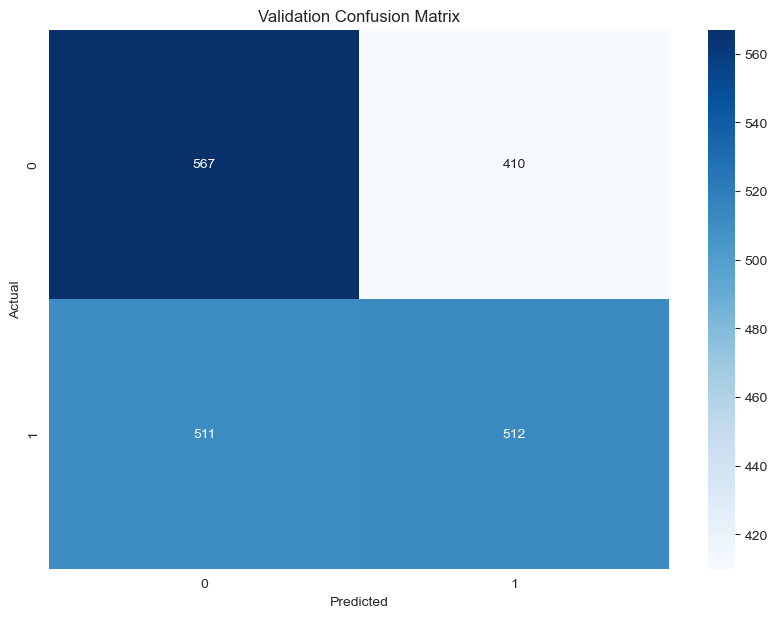

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print('Validation Confusion Matrix:')
print(val_conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Validation Confusion Matrix')
plt.show()

In [1]:
import pickle
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

NameError: name 'svm' is not defined

In [ ]:
test_images, test_labels = load_images(test_dir)  
test_images = test_images / 255.0

In [ ]:
n_test_samples, test_img_height, test_img_width, test_img_channels = test_images.shape
test_images_flat = test_images.reshape(n_test_samples, -1)
test_images_flat_scaled = scaler.transform(test_images_flat)

In [ ]:
test_images_flat_scaled = scaler.transform(test_images_flat)


In [ ]:
# Determine a new perplexity value for the test data
test_perplexity = min(30, n_test_samples - 1)

# Create a new t-SNE instance for the test data
test_tsne = TSNE(n_components=2, perplexity=test_perplexity, random_state=42)
test_images_tsne = test_tsne.fit_transform(test_images_flat_scaled)

In [ ]:
y_test_pred = svm.predict(test_images_flat_scaled)

In [ ]:
y_test_pred

In [ ]:
df_test_tsne = pd.DataFrame()
df_test_tsne['X'] = test_images_tsne[:, 0]
df_test_tsne['Y'] = test_images_tsne[:, 1]
df_test_tsne['Predicted Label'] = y_test_pred
df_test_tsne['Predicted Label'] = df_test_tsne['Predicted Label'].map({0: 'Cat', 1: 'Dog'})

In [ ]:
fig = px.scatter(df_test_tsne, x='X', y='Y', color='Predicted Label', title='t-SNE visualization of Test Data Predictions')
fig.show()

In [ ]:
def plot_test_samples(images, tsne_data, predictions, sample_count=10):
    sample_indices = np.random.choice(range(len(images)), sample_count, replace=False)
    sample_images = images[sample_indices]
    tsne_samples = tsne_data[sample_indices]
    pred_samples = predictions[sample_indices]

    fig = px.scatter(tsne_samples, x=tsne_samples[:, 0], y=tsne_samples[:, 1], color=pred_samples.astype(str),
                     title="Test Data Predictions (t-SNE Space)")
    fig.show()

plot_test_samples(test_images, test_images_tsne, y_test_pred)

In [ ]:
test_predictions = pd.DataFrame({'Id': np.arange(1, n_test_samples + 1), 'Label': y_test_pred})
test_predictions['Label'] = test_predictions['Label'].map({0: 'Cat', 1: 'Dog'})
test_predictions.to_csv('test_predictions.csv', index=False)

In [ ]:
def plot_samples(tsne_data, y_true, y_pred, sample_count=10):
    sample_indices = np.random.choice(range(len(tsne_data)), sample_count, replace=False)
    tsne_samples = tsne_data[sample_indices]
    y_true_samples = y_true[sample_indices]
    y_pred_samples = y_pred[sample_indices]

    df_tsne_samples = pd.DataFrame()
    df_tsne_samples['X'] = tsne_samples[:, 0]
    df_tsne_samples['Y'] = tsne_samples[:, 1]
    df_tsne_samples['True Label'] = y_true_samples
    df_tsne_samples['Predicted Label'] = y_pred_samples
    df_tsne_samples['True Label'] = df_tsne_samples['True Label'].map({0: 'Cat', 1: 'Dog'})
    df_tsne_samples['Predicted Label'] = df_tsne_samples['Predicted Label'].map({0: 'Cat', 1: 'Dog'})

    fig = px.scatter(df_tsne_samples, x='X', y='Y', color='True Label', symbol='Predicted Label', title="True vs Predicted Labels (t-SNE Space)")
    fig.show()

# Apply t-SNE to the validation data
val_tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
val_images_tsne = val_tsne.fit_transform(X_val)

# Plot true vs predicted labels for the validation set
plot_samples(val_images_tsne, y_val, y_val_pred)